In [1]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


결측값 처리

In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

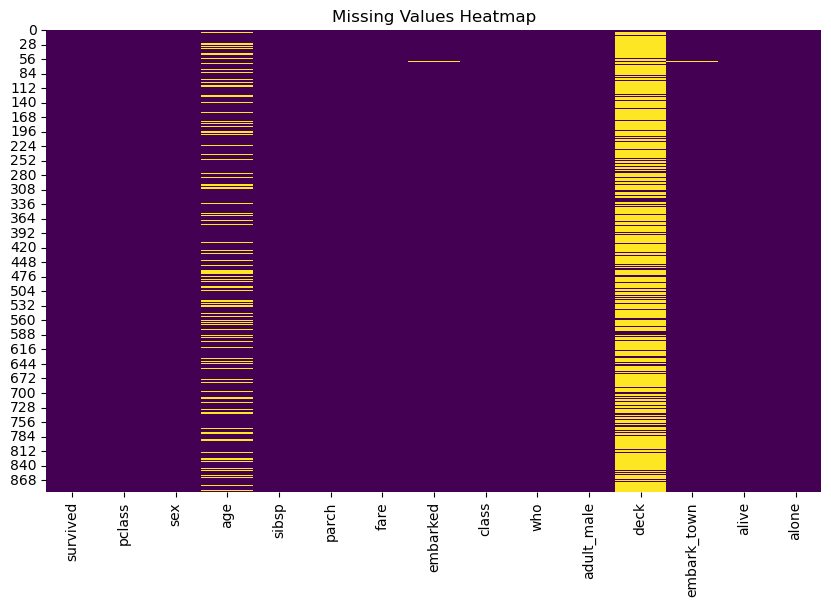

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [10]:
# 결측값 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 결측값 처리: 나이(age) 열은 평균값으로 대체, 나머지 결측값은 드롭
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic.dropna(subset=['embarked', 'deck'], inplace=True)

# 결측값 처리 후 확인
print(titanic.isnull().sum())

생존자와 사망자 수

In [17]:
# 생존자와 사망자 수
survival_counts = titanic['survived'].value_counts()
print(survival_counts)

1    134
0     67
Name: survived, dtype: int64


In [15]:
# 생존율
survival_rate = titanic['survived'].mean()
print(f'생존율: {survival_rate:.2f}')

생존율: 0.67


성별에 따른 생존율

In [19]:
# 성별에 따른 생존률
gender_survival_rate = titanic.groupby('sex')['survived'].mean()
print(gender_survival_rate)

sex
female    0.936842
male      0.424528
Name: survived, dtype: float64


1등석, 2등석, 3등석 승객의 생존률을 비교

In [20]:
# 클래스에 따른 생존률
class_survival_rate = titanic.groupby('pclass')['survived'].mean()
print(class_survival_rate)

pclass
1    0.66474
2    0.81250
3    0.50000
Name: survived, dtype: float64


히스토그램을 통해 승객 나이의 분포를 확인

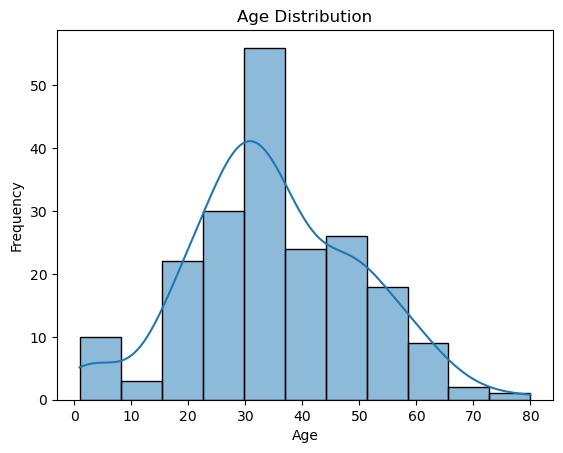

In [21]:
# 나이 분포
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


커널 밀도 추정을 통해 승객 요금의 분포를 확인

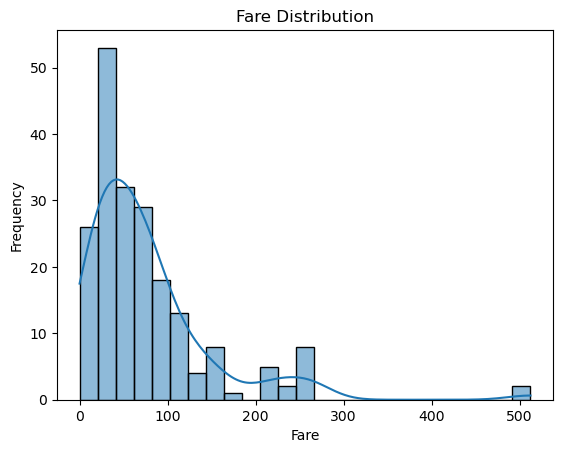

In [22]:
# 요금 분포
sns.histplot(titanic['fare'], kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

생존 여부에 따른 성별 분포

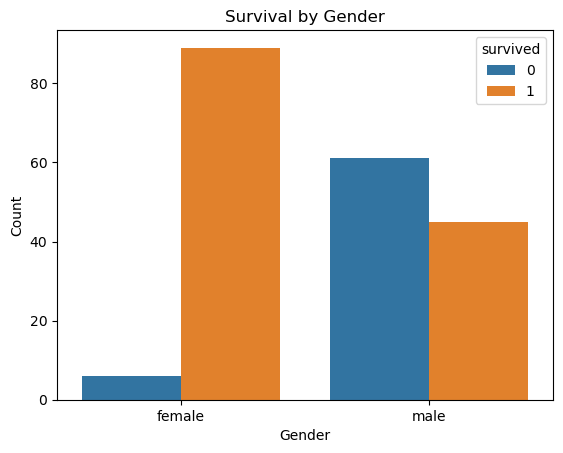

In [23]:
# 생존 여부에 따른 성별 분포
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

포인트 플롯을 통해 각 클래스별 생존률을 시각화

/var/folders/5v/84j80039417cb28c_fpx0f740000gn/T/ipykernel_90972/3821080095.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic, ci=None, palette="viridis")


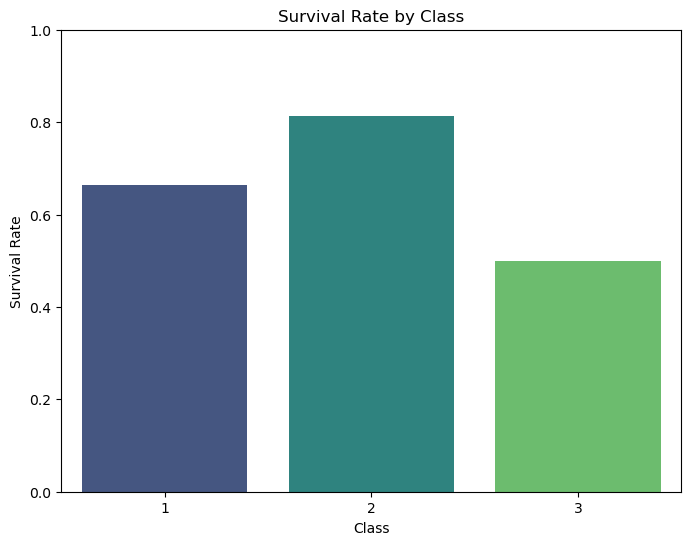

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 타이타닉 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 결측값 처리: 나이(age) 열은 평균값으로 대체, 나머지 결측값은 드롭
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic.dropna(subset=['embarked', 'deck'], inplace=True)

# 클래스에 따른 생존률 바 플롯
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=titanic, ci=None, palette="viridis")
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # y축 범위를 0에서 1로 설정
plt.show()

특성들 간의 상관관계를 히트맵을 통해 시각화

/var/folders/5v/84j80039417cb28c_fpx0f740000gn/T/ipykernel_90972/2029094315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = titanic.corr()


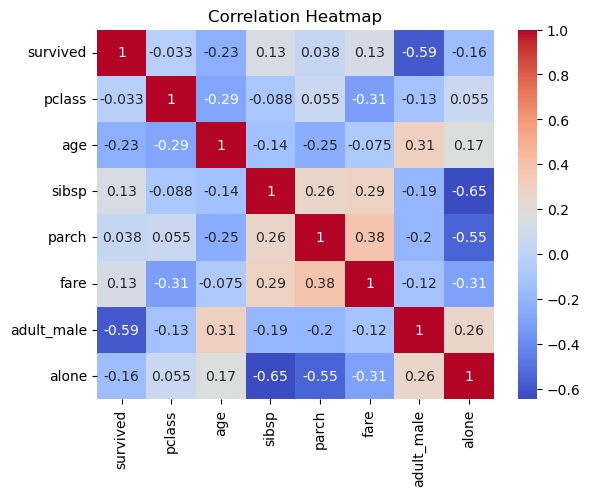

In [27]:
# 히트맵으로 상관관계 시각화
correlation = titanic.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()